In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I'll be using a CSV file from a dps tracker website, so I'll use the pd.read_csv function to make a dataframe. I'll be working with a relatively short data set, so I won't use .head when I call the dataframe. 

In [121]:
dpsdata = pd.read_csv('dps.csv')

dpsdata

,Name,Amount,Casts,Avg Cast,Hits,Avg Hit,Crit %,DHit %,DPS,rDPS,aDPS,Unnamed: 11
0,Comet in Black,2209935$8.77%2.21m,21,105.2k,24,92.1k,25.0%,50.0%,"2,678.6","2,486.3","2,678.6",NaN
1,Thunder in Magenta,2115666$8.40%2.12m,21,100.7k,21,100.7k,28.6%,42.9%,"2,564.3","2,349.2","2,564.3",NaN
2,Polishing Hammer,2052104$8.14%2.05m,20,102.6k,23,89.2k,100.0%,100.0%,"2,487.3","2,297.5","2,487.3",NaN
3,Hammer Brush,1924384$7.64%1.92m,20,96.2k,23,83.7k,100.0%,100.0%,"2,332.5","2,156.6","2,332.5",NaN
4,Stone in Yellow,1893927$7.52%1.89m,21,90.2k,21,90.2k,14.3%,57.1%,"2,295.5","2,148.1","2,295.5",NaN
5,Blizzard in Cyan,1779193$7.06%1.78m,20,89.0k,20,89.0k,20.0%,50.0%,"2,156.5","1,999.5","2,156.5",NaN
6,Hammer Stamp,1764012$7.00%1.76m,20,88.2k,23,76.7k,100.0%,100.0%,"2,138.1","1,990.5","2,138.1",NaN
7,Rainbow Drip,1589009$6.31%1.59m,15,105.9k,16,99.3k,43.8%,37.5%,"1,926.0","1,811.3","1,926.0",NaN
8,Water in Blue,1377399$5.47%1.38m,25,55.1k,25,55.1k,28.0%,44.0%,"1,669.5","1,650.5","1,669.5",NaN
9,Aero in Green,1360046$5.40%1.36m,25,54.4k,25,54.4k,36.0%,32.0%,"1,648.4","1,628.0","1,648.4",NaN


The last 3 indexes are garbage data, so I'll cull them.

In [122]:
dpsdata.drop([19, 20, 21], inplace=True)
dpsdata

,Name,Amount,Casts,Avg Cast,Hits,Avg Hit,Crit %,DHit %,DPS,rDPS,aDPS,Unnamed: 11
0,Comet in Black,2209935$8.77%2.21m,21,105.2k,24,92.1k,25.0%,50.0%,"2,678.6","2,486.3","2,678.6",NaN
1,Thunder in Magenta,2115666$8.40%2.12m,21,100.7k,21,100.7k,28.6%,42.9%,"2,564.3","2,349.2","2,564.3",NaN
2,Polishing Hammer,2052104$8.14%2.05m,20,102.6k,23,89.2k,100.0%,100.0%,"2,487.3","2,297.5","2,487.3",NaN
3,Hammer Brush,1924384$7.64%1.92m,20,96.2k,23,83.7k,100.0%,100.0%,"2,332.5","2,156.6","2,332.5",NaN
4,Stone in Yellow,1893927$7.52%1.89m,21,90.2k,21,90.2k,14.3%,57.1%,"2,295.5","2,148.1","2,295.5",NaN
5,Blizzard in Cyan,1779193$7.06%1.78m,20,89.0k,20,89.0k,20.0%,50.0%,"2,156.5","1,999.5","2,156.5",NaN
6,Hammer Stamp,1764012$7.00%1.76m,20,88.2k,23,76.7k,100.0%,100.0%,"2,138.1","1,990.5","2,138.1",NaN
7,Rainbow Drip,1589009$6.31%1.59m,15,105.9k,16,99.3k,43.8%,37.5%,"1,926.0","1,811.3","1,926.0",NaN
8,Water in Blue,1377399$5.47%1.38m,25,55.1k,25,55.1k,28.0%,44.0%,"1,669.5","1,650.5","1,669.5",NaN
9,Aero in Green,1360046$5.40%1.36m,25,54.4k,25,54.4k,36.0%,32.0%,"1,648.4","1,628.0","1,648.4",NaN


I'll check the data types, because I want to do some manipulation.

In [123]:
dpsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         19 non-null     object 
 1   Amount       19 non-null     object 
 2   Casts        19 non-null     int64  
 3   Avg Cast     19 non-null     object 
 4   Hits         19 non-null     object 
 5   Avg Hit      19 non-null     object 
 6   Crit %       19 non-null     object 
 7   DHit %       19 non-null     object 
 8   DPS          19 non-null     object 
 9   rDPS         19 non-null     object 
 10  aDPS         19 non-null     object 
 11  Unnamed: 11  0 non-null      float64
dtypes: float64(1), int64(1), object(10)
memory usage: 1.9+ KB


Most of the columns are non-manipulatable objects. Next I'll convert the 3 DPS columns into floats, along with crit% and Dhit%, and I'll make Avg Hit into an Int. I must remove commas and other characters before the data types can be changed.

In [124]:
dpsdata['DPS'] = dpsdata['DPS'].str.replace(',', '').astype(float)
dpsdata['rDPS'] = dpsdata['rDPS'].str.replace(',', '').astype(float)
dpsdata['aDPS'] = dpsdata['aDPS'].str.replace(',', '').astype(float)
dpsdata['Crit %'] = dpsdata['Crit %'].str.replace('%', '').astype(float)
dpsdata['DHit %'] = dpsdata['DHit %'].str.replace('%', '').astype(float)
dpsdata['Avg Hit'] = dpsdata['Avg Hit'].str.replace('k', '00')
dpsdata['Avg Hit'] = dpsdata['Avg Hit'].str.replace('.', '').astype(int)
dpsdata['Hits'] = dpsdata['Hits'].astype(int)

In [125]:
dpsdata.dtypes

Name            object
Amount          object
Casts            int64
Avg Cast        object
Hits             int64
Avg Hit          int64
Crit %         float64
DHit %         float64
DPS            float64
rDPS           float64
aDPS           float64
Unnamed: 11    float64
dtype: object

The 3 DPS columns are now converted. Now I'm gonna make a new column called buffIndex. This will divide the DPS (pure output) by the rDPS (pure output modified by removing some % attributed to external buffs) to give a buff index per skill, showing which skills are generally buffed vs. which skills are generally not buffed.

In [126]:
dpsdata['buffIndex'] = dpsdata['DPS'] / dpsdata['rDPS']
dpsdata

,Name,Amount,Casts,Avg Cast,Hits,Avg Hit,Crit %,DHit %,DPS,rDPS,aDPS,Unnamed: 11,buffIndex
0,Comet in Black,2209935$8.77%2.21m,21,105.2k,24,92100,25.0,50.0,2678.6,2486.3,2678.6,NaN,1.077344
1,Thunder in Magenta,2115666$8.40%2.12m,21,100.7k,21,100700,28.6,42.9,2564.3,2349.2,2564.3,NaN,1.091563
2,Polishing Hammer,2052104$8.14%2.05m,20,102.6k,23,89200,100.0,100.0,2487.3,2297.5,2487.3,NaN,1.082612
3,Hammer Brush,1924384$7.64%1.92m,20,96.2k,23,83700,100.0,100.0,2332.5,2156.6,2332.5,NaN,1.081564
4,Stone in Yellow,1893927$7.52%1.89m,21,90.2k,21,90200,14.3,57.1,2295.5,2148.1,2295.5,NaN,1.068619
5,Blizzard in Cyan,1779193$7.06%1.78m,20,89.0k,20,89000,20.0,50.0,2156.5,1999.5,2156.5,NaN,1.078520
6,Hammer Stamp,1764012$7.00%1.76m,20,88.2k,23,76700,100.0,100.0,2138.1,1990.5,2138.1,NaN,1.074152
7,Rainbow Drip,1589009$6.31%1.59m,15,105.9k,16,99300,43.8,37.5,1926.0,1811.3,1926.0,NaN,1.063325
8,Water in Blue,1377399$5.47%1.38m,25,55.1k,25,55100,28.0,44.0,1669.5,1650.5,1669.5,NaN,1.011512
9,Aero in Green,1360046$5.40%1.36m,25,54.4k,25,54400,36.0,32.0,1648.4,1628.0,1648.4,NaN,1.012531


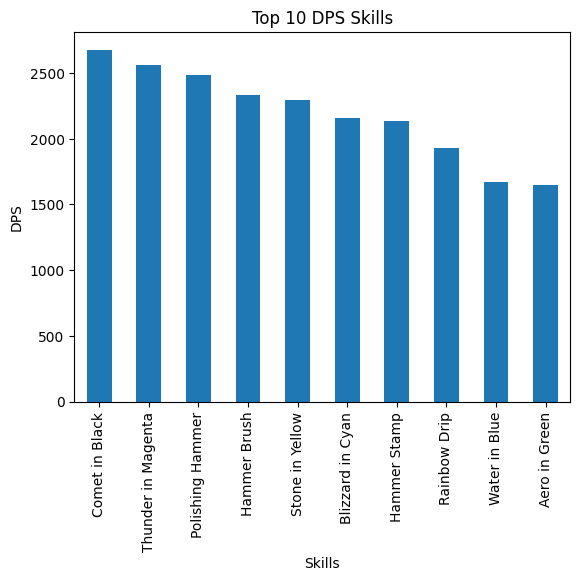

In [127]:
skillDPSplot = dpsdata.head(10).plot(kind='bar', x='Name', y='DPS', title = 'Top 10 DPS Skills', legend=False)
xlabel = skillDPSplot.set_xlabel("Skills")
ylabel = skillDPSplot.set_ylabel("DPS")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Comet in Black'),
  Text(1, 0, 'Thunder in Magenta'),
  Text(2, 0, 'Polishing Hammer'),
  Text(3, 0, 'Hammer Brush'),
  Text(4, 0, 'Stone in Yellow'),
  Text(5, 0, 'Blizzard in Cyan'),
  Text(6, 0, 'Hammer Stamp'),
  Text(7, 0, 'Rainbow Drip'),
  Text(8, 0, 'Water in Blue'),
  Text(9, 0, 'Aero in Green')])

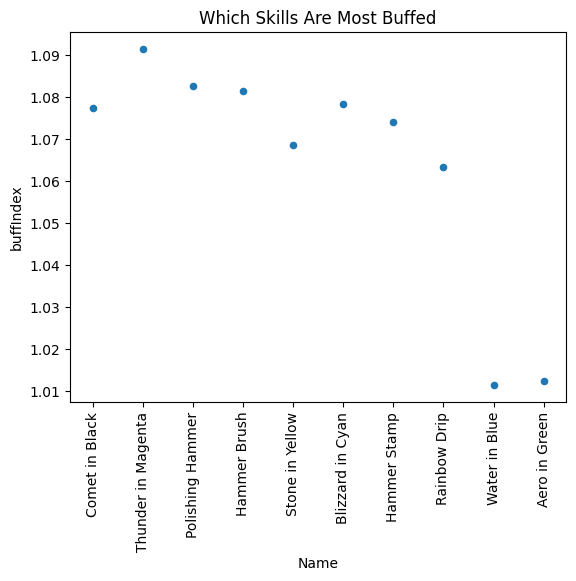

In [128]:
buffIndexPlot = dpsdata.head(10).plot(kind='scatter', x='Name', y='buffIndex', title = 'Which Skills Are Most Buffed', legend=False)
plt.xticks(rotation=90)

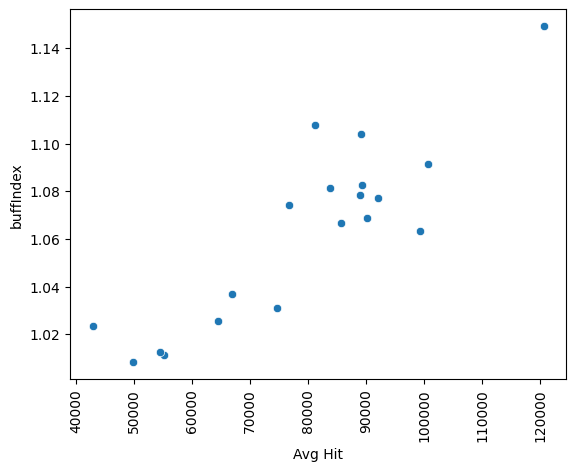

In [137]:
sns.scatterplot(x='Avg Hit', y='buffIndex', data=dpsdata)
plt.xticks(rotation=90)
plt.show()

Here we can see that the highest average hits generally have a higher buff index. Considering the buff index is a very small multiplier and the average hit has a much wider variance, we can assume that the buff index is not particularly causative of the trend upward. The lower hitting skills are chosen to be used outside of buff windows, and the higher hitting skills are used most relatively more often in buff windows.

(1.0, 1.16)

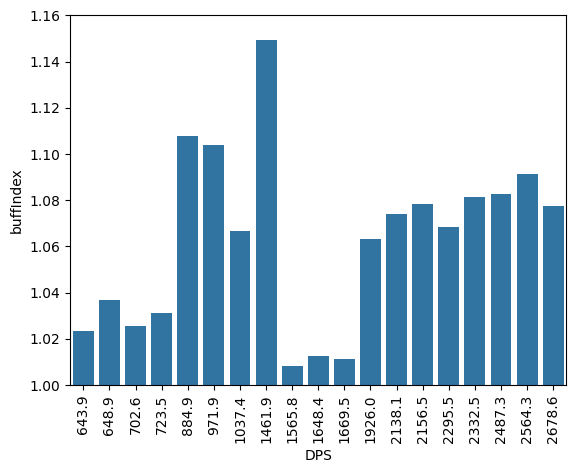

In [130]:
sns.barplot(x='DPS', y='buffIndex', data=dpsdata)
plt.xticks(rotation=90)
plt.ylim(1.00, 1.16)

Here we see that the skills with the highest DPS are not necessarily the highest in the buff index. This would suggest that the factors that influence a skill's DPS have correlations elsewhere, though there is a trend in the higher skills having a slightly higher buff index.

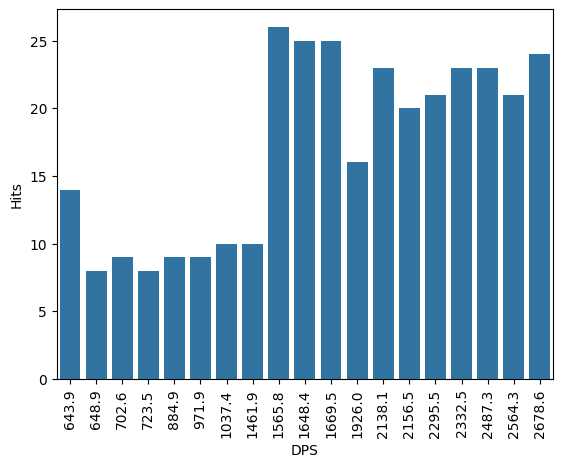

In [138]:
sns.barplot(x='DPS', y='Hits', data=dpsdata)
plt.xticks(rotation=90)
plt.show()

Here we see a stronger trend toward skills with higher DPS having more total hits. This means the more often a skill is used, the higher its DPS, which makes sense.

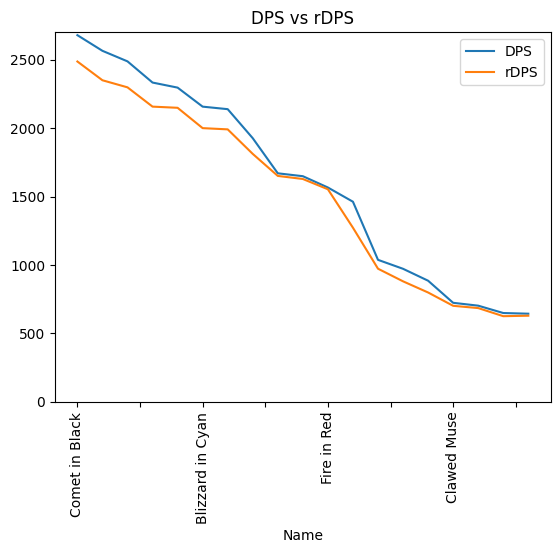

In [146]:
plot = dpsdata.plot(kind='line', x='Name', y=['DPS', 'rDPS'], title = 'DPS vs rDPS')
plt.xticks(rotation=90)
plt.ylim(0, 2700)
plt.show()

The relationship between the DPS of skills and their buff index is visually represented by the space between the lines of this line graph. While some skills in the median have no meaningful difference, it's clear that at the highest levels of DPS/rDPS, the difference is most pronounced. This indicates that this player actively assesses the buff window and makes sure to use their highest damage skills.